In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Set random seed
torch.manual_seed(42)

In [3]:

# Generate 2D input features
n_samples = 1000
X1 = torch.distributions.Uniform(0, 5).sample((n_samples, 1))  # Feature 1
X2 = torch.distributions.Uniform(0, 5).sample((n_samples, 1))  # Feature 2

In [4]:
# True weights and bias
w1, w2, b = 1.2, -0.8, -2.5  

In [5]:
# Compute logits and apply sigmoid
logits = w1 * X1 + w2 * X2 + b
prob_Y = torch.sigmoid(logits)  # Probabilities

In [6]:
prob_Y

tensor([[0.4690],
        [0.8697],
        [0.2377],
        [0.6852],
        [0.2472],
        [0.5074],
        [0.0922],
        [0.7336],
        [0.8787],
        [0.0406],
        [0.6429],
        [0.6637],
        [0.8729],
        [0.2455],
        [0.4179],
        [0.0462],
        [0.9018],
        [0.1551],
        [0.0173],
        [0.1364],
        [0.2652],
        [0.2519],
        [0.2691],
        [0.8527],
        [0.0068],
        [0.0701],
        [0.0393],
        [0.1062],
        [0.1793],
        [0.0372],
        [0.5522],
        [0.0402],
        [0.7888],
        [0.6758],
        [0.0772],
        [0.1758],
        [0.1189],
        [0.8798],
        [0.2317],
        [0.0974],
        [0.7143],
        [0.0202],
        [0.4330],
        [0.6808],
        [0.7392],
        [0.1329],
        [0.4755],
        [0.1541],
        [0.3953],
        [0.0859],
        [0.0016],
        [0.0859],
        [0.0707],
        [0.8696],
        [0.0688],
        [0

In [7]:
# Sample class labels
Y = torch.distributions.Bernoulli(prob_Y).sample()

Text(0.5, 1.0, 'Generated 2D Logistic Regression Data')

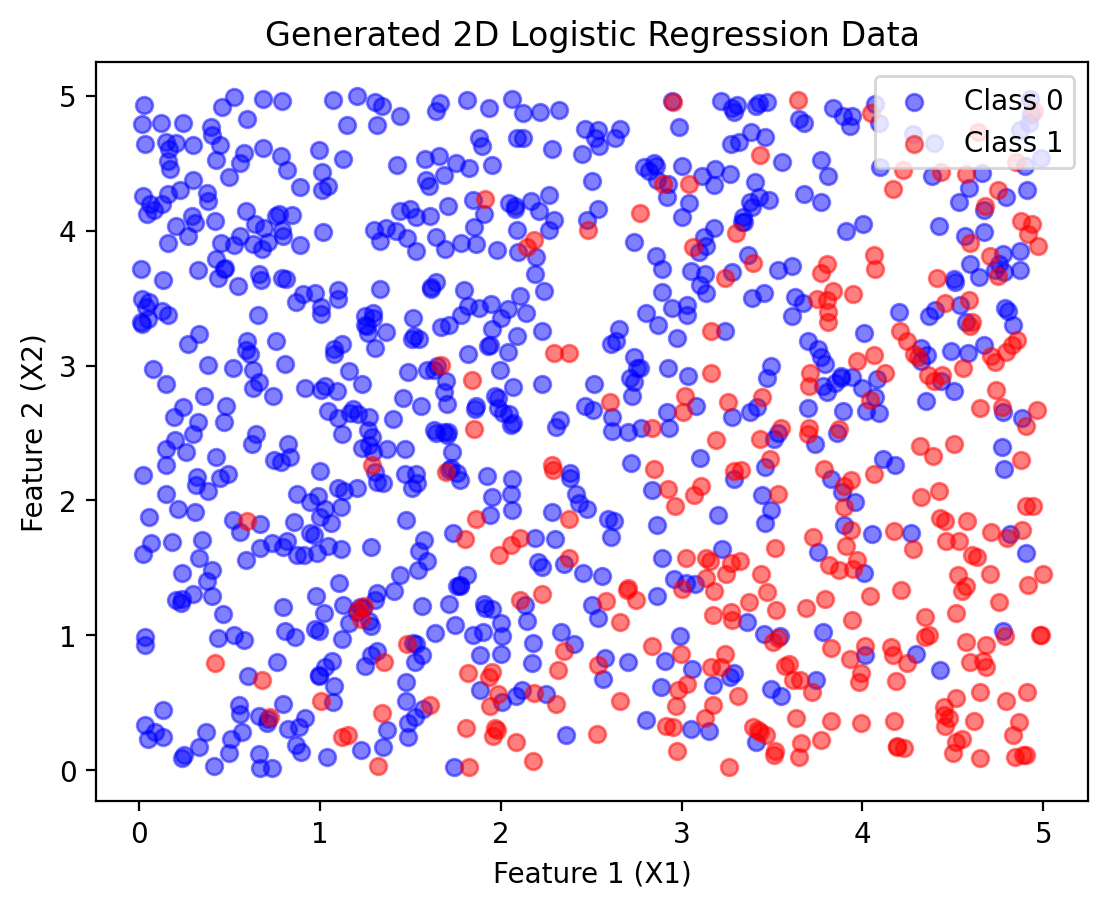

In [8]:
# Convert to NumPy for visualization
X1_np, X2_np, Y_np = X1.numpy(), X2.numpy(), Y.numpy()

# Plot data points
plt.scatter(X1_np[Y_np == 0], X2_np[Y_np == 0], color="blue", label="Class 0", alpha=0.5)
plt.scatter(X1_np[Y_np == 1], X2_np[Y_np == 1], color="red", label="Class 1", alpha=0.5)
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.legend()
plt.title("Generated 2D Logistic Regression Data")


In [9]:
import torch.nn as nn
import torch.optim as optim

# Stack X1 and X2 into a single tensor
X_train = torch.cat((X1, X2), dim=1)

# Define logistic regression model
class LogisticRegression2D(nn.Module):
    def __init__(self):
        super(LogisticRegression2D, self).__init__()
        self.linear = nn.Linear(2, 1)  # Two inputs, one output

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation

# Initialize model
model = LogisticRegression2D()
loss_fn = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    Y_pred = model(X_train)  # Forward pass
    loss = loss_fn(Y_pred, Y.view(-1, 1))  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Extract learned parameters
w1_learned, w2_learned = model.linear.weight[0].detach().numpy()
b_learned = model.linear.bias[0].detach().numpy()
print(f"Learned Parameters: w1 = {w1_learned:.4f}, w2 = {w2_learned:.4f}, b = {b_learned:.4f}")


Epoch 0, Loss: 2.0864
Epoch 200, Loss: 0.4884
Epoch 400, Loss: 0.4536
Epoch 600, Loss: 0.4395
Epoch 800, Loss: 0.4318
Learned Parameters: w1 = 0.6339, w2 = -0.8716, b = -0.4170


/var/folders/z8/gpvqr8mn3w9_f38byxhnsk780000gn/T/ipykernel_8863/319328462.py:23: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1_grid, X2_grid, Z, levels=[0.5], colors="black", linestyles="dashed", label="Learned Boundary")


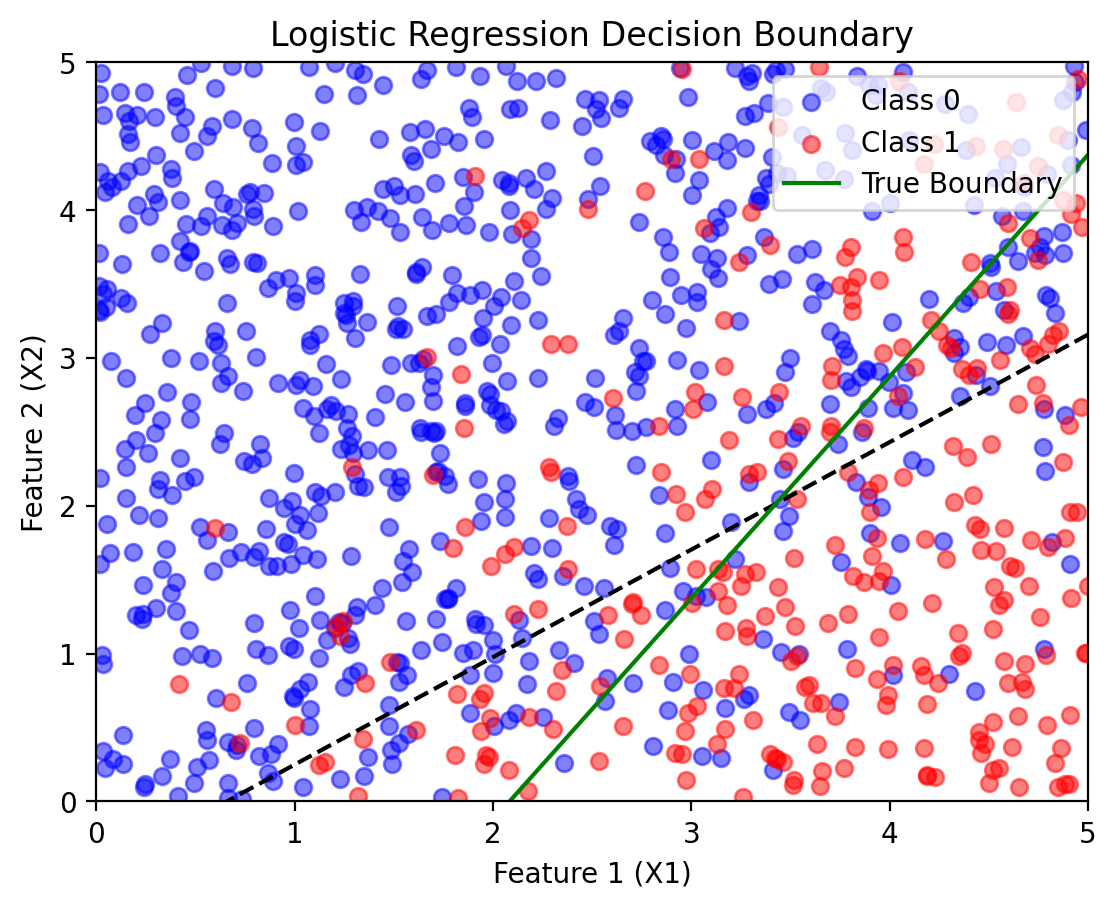

In [13]:
def plot_decision_boundary(model, X1_np, X2_np, Y_np, w1_true, w2_true, b_true):
    """Plots the true and learned decision boundaries."""
    
    # Generate mesh grid
    x1_vals = np.linspace(0, 5, 100)
    x2_vals = np.linspace(0, 5, 100)
    X1_grid, X2_grid = np.meshgrid(x1_vals, x2_vals)

    # Compute model's learned decision boundary
    with torch.no_grad():
        Z = model(torch.tensor(np.c_[X1_grid.ravel(), X2_grid.ravel()], dtype=torch.float32))
        Z = Z.view(X1_grid.shape).numpy()

    # Compute true decision boundary
    x1_boundary = np.linspace(0,5, 100)
    x2_boundary_true = - (w1_true / w2_true) * x1_boundary - (b_true / w2_true)

    # Plot data points
    plt.scatter(X1_np[Y_np == 0], X2_np[Y_np == 0], color="blue", label="Class 0", alpha=0.5)
    plt.scatter(X1_np[Y_np == 1], X2_np[Y_np == 1], color="red", label="Class 1", alpha=0.5)

    # Plot learned decision boundary
    plt.contour(X1_grid, X2_grid, Z, levels=[0.5], colors="black", linestyles="dashed", label="Learned Boundary")

    # Plot true decision boundary
    plt.plot(x1_boundary, x2_boundary_true, color="green", linestyle="solid", label="True Boundary")

    plt.xlabel("Feature 1 (X1)")
    plt.ylabel("Feature 2 (X2)")
    plt.legend()
    plt.title("Logistic Regression Decision Boundary")
    plt.ylim([0, 5])


# Call the function with true and learned parameters
plot_decision_boundary(model, X1_np, X2_np, Y_np, w1_true=1.2, w2_true=-0.8, b_true=-2.5)
